This notebook just shows the investigation into the repeated shifting error in the data.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
data_18 = pd.read_csv('DemandData_2018.csv')
data_17 = pd.read_csv('DemandData_2017.csv')
data_11 = pd.read_csv('DemandData_2011-2016.csv')

In [3]:
data_18.columns = ['date', 'period'] + list(data_18.columns[2:])
data_17.columns = ['date', 'period'] + list(data_17.columns[2:])
data_11.columns = ['date', 'period'] + list(data_11.columns[2:])

In [4]:
energy = pd.concat([data_11, data_17, data_18])
energy.reset_index(drop=True, inplace=True)

In [5]:
energy.head()

,date,period,ND,I014_ND,TSD,I014_TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,...,I014_PUMP_STORAGE_PUMPING,FRENCH_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,I014_FRENCH_FLOW,I014_BRITNED_FLOW,I014_MOYLE_FLOW,I014_EAST_WEST_FLOW,I014_TSD.1
0,01-Jan-2011,1,34606,34677,35648,35685,31058,484,1730,0,...,67,1939,0,-382,0,1922,0,-382,0,35685.0
1,01-Jan-2011,2,35092,35142,36089,36142,31460,520,1730,0,...,20,1939,0,-381,0,1922,0,-381,0,36142.0
2,01-Jan-2011,3,34725,34761,36256,36234,31109,520,1730,0,...,558,1989,0,-382,0,1974,0,-382,0,36234.0
3,01-Jan-2011,4,33649,33698,35628,35675,30174,512,1730,0,...,997,1991,0,-381,0,1975,0,-381,0,35675.0
4,01-Jan-2011,5,32644,32698,34752,34805,29253,512,1730,0,...,1127,1992,0,-382,0,1975,0,-382,0,34805.0


In [6]:
energy.period.value_counts()
# important --- it looks like for a few of these entries, periods 47 and 48 were accidentally inputted as 49 and 50.
# In fact, this isn't the case, but this points to a big problem needing addressing.

25    2905
24    2905
22    2905
21    2905
20    2905
19    2905
18    2905
17    2905
16    2905
15    2905
14    2905
13    2905
12    2905
11    2905
10    2905
9     2905
8     2905
7     2905
6     2905
5     2905
4     2905
3     2905
2     2905
23    2905
1     2905
37    2905
26    2905
46    2905
45    2905
44    2905
43    2905
42    2905
41    2905
40    2905
39    2905
38    2905
36    2905
35    2905
34    2905
33    2905
32    2905
31    2905
30    2905
29    2905
28    2905
27    2905
48    2897
47    2897
49       8
50       8
Name: period, dtype: int64

In [7]:
energy[energy.period == 49].date.values
# entries which have a period 49. Need to investigate what's going on on these dates ---
# are 47 & 48 simply entered as 49 & 50, or is it not so simple an issue?

array(['30-Oct-2011', '28-Oct-2012', '27-Oct-2013', '26-Oct-2014',
       '25-Oct-2015', '30-Oct-2016', '29-OCT-2017', '28-OCT-2018'],
      dtype=object)

In [8]:
energy[energy.date == '30-Oct-2011']
# by inspection, we can see that what is happening is that there are 50 periods entered for this date.
# Inspecting the other October dates including period 49, this is also found to be the case.

,date,period,ND,I014_ND,TSD,I014_TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,...,I014_PUMP_STORAGE_PUMPING,FRENCH_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,I014_FRENCH_FLOW,I014_BRITNED_FLOW,I014_MOYLE_FLOW,I014_EAST_WEST_FLOW,I014_TSD.1
14494,30-Oct-2011,1,26121,26262,26630,26779,23371,1062,1844,0,...,17,466,438,0,0,459,438,0,0,26779.0
14495,30-Oct-2011,2,25290,25458,25965,26142,22591,413,1844,0,...,181,466,426,0,0,460,426,0,0,26142.0
14496,30-Oct-2011,3,25767,25709,27026,26666,22919,413,1844,0,...,291,523,-470,0,0,516,-470,0,0,26666.0
14497,30-Oct-2011,4,25767,25921,27067,26868,23216,1004,1844,0,...,295,523,-512,0,0,516,-512,0,0,26868.0
14498,30-Oct-2011,5,25081,25249,26686,26775,22729,413,1844,0,...,509,523,-507,0,0,516,-507,0,0,26775.0
14499,30-Oct-2011,6,24542,24510,26181,26111,22099,1004,1844,0,...,606,523,-466,0,0,516,-466,0,0,26111.0
14500,30-Oct-2011,7,23670,23828,25309,25698,21496,1004,1844,0,...,1271,549,456,0,0,541,456,0,0,25698.0
14501,30-Oct-2011,8,23600,23556,25319,25513,21147,909,1844,0,...,1432,549,497,0,0,541,497,0,0,25513.0
14502,30-Oct-2011,9,23017,23165,24940,25505,20646,909,1844,0,...,1740,549,497,0,0,541,497,0,0,25505.0
14503,30-Oct-2011,10,22558,22702,24604,25027,20172,868,1844,0,...,1864,549,497,0,0,541,497,0,0,25027.0


Finding the days where there are no 47 & 48 periods, and doing the same investigation into what's up:

In [9]:
energy.groupby('date').period.count().sort_values().iloc[:8]

date
25-MAR-2018    46
25-Mar-2012    46
26-MAR-2017    46
27-Mar-2011    46
30-Mar-2014    46
31-Mar-2013    46
27-Mar-2016    46
29-Mar-2015    46
Name: period, dtype: int64

In [10]:
energy[energy.date == '25-Mar-2011']
# only 46 entries for the date.

,date,period,ND,I014_ND,TSD,I014_TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,...,I014_PUMP_STORAGE_PUMPING,FRENCH_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,I014_FRENCH_FLOW,I014_BRITNED_FLOW,I014_MOYLE_FLOW,I014_EAST_WEST_FLOW,I014_TSD.1
3984,25-Mar-2011,1,31095,31024,33301,33230,27980,124,1737,0,...,1217,805,0,-391,0,794,0,-391,0,33230.0
3985,25-Mar-2011,2,30819,30775,32997,32955,27755,103,1737,0,...,1191,805,0,-391,0,794,0,-391,0,32955.0
3986,25-Mar-2011,3,30279,30234,32668,32635,27249,103,1737,0,...,1412,764,0,-391,0,753,0,-391,0,32635.0
3987,25-Mar-2011,4,29394,29352,31850,31963,26431,81,1737,0,...,1622,764,0,-390,0,753,0,-390,0,31963.0
3988,25-Mar-2011,5,28652,28625,31304,31433,25753,81,1737,0,...,1818,874,0,-390,0,862,0,-390,0,31433.0
3989,25-Mar-2011,6,28545,28523,31176,31307,25602,49,1737,0,...,1795,874,0,-391,0,861,0,-391,0,31307.0
3990,25-Mar-2011,7,28200,28128,30822,30957,25218,49,1737,0,...,1794,722,0,-390,0,712,0,-390,0,30957.0
3991,25-Mar-2011,8,27685,27592,30354,30540,24692,31,1737,0,...,1959,723,0,-391,0,712,0,-391,0,30540.0
3992,25-Mar-2011,9,27515,27392,30129,30334,24648,31,1737,0,...,1908,594,0,-391,0,587,0,-391,0,30334.0
3993,25-Mar-2011,10,27569,27508,30220,30397,24763,31,1737,0,...,1939,581,0,-391,0,571,0,-391,0,30397.0


need to explore whether the missing periods are entered in the next day while the additional periods belong to a different day - i.e. whether the issue can be resolved by setting our own index with date_range, and ignoring the periods. (whether the issue is a lasting shift in the periods entered for each day, or whether the issue lies only within the two days a year where the number of periods is wrong...)

The best way I found of investigating what the problem is is to visualize the daily electricity demand on days preceding the mistake, on the day of the mistake, and on days following the mistake, and looking for repeated differences in shape for the mistakes of the same kind in different years. This makes use of the daily patterns looking very similar. There should be some kind of shift if that is the issue --- a difference in shape before and after the mistake which lasts (isn't just found on the day of the mistake).

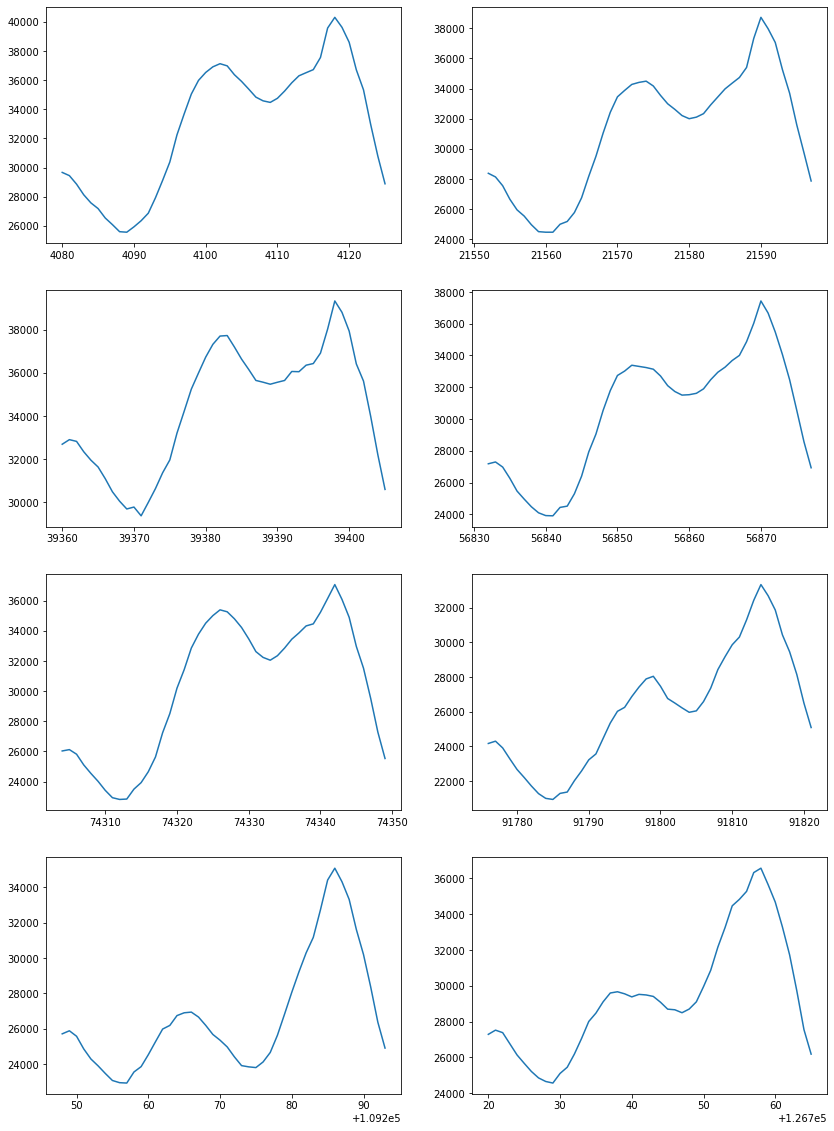

In [11]:
fix, ax = plt.subplots(nrows=4, ncols=2, figsize=(14,20))

ax[0,0].plot(energy[energy.date == '27-Mar-2011'].ND)
ax[0,1].plot(energy[energy.date == '25-Mar-2012'].ND)
ax[1,0].plot(energy[energy.date == '31-Mar-2013'].ND)
ax[1,1].plot(energy[energy.date == '30-Mar-2014'].ND)
ax[2,0].plot(energy[energy.date == '29-Mar-2015'].ND)
ax[2,1].plot(energy[energy.date == '27-Mar-2016'].ND)
ax[3,0].plot(energy[energy.date == '26-MAR-2017'].ND)
ax[3,1].plot(energy[energy.date == '25-MAR-2018'].ND)

plt.show()

# These plots show demand on each of the March mistake days - the days with too few reported demand entries.
# We first compare these to the October mistake days - the days with too many reported demand entries.

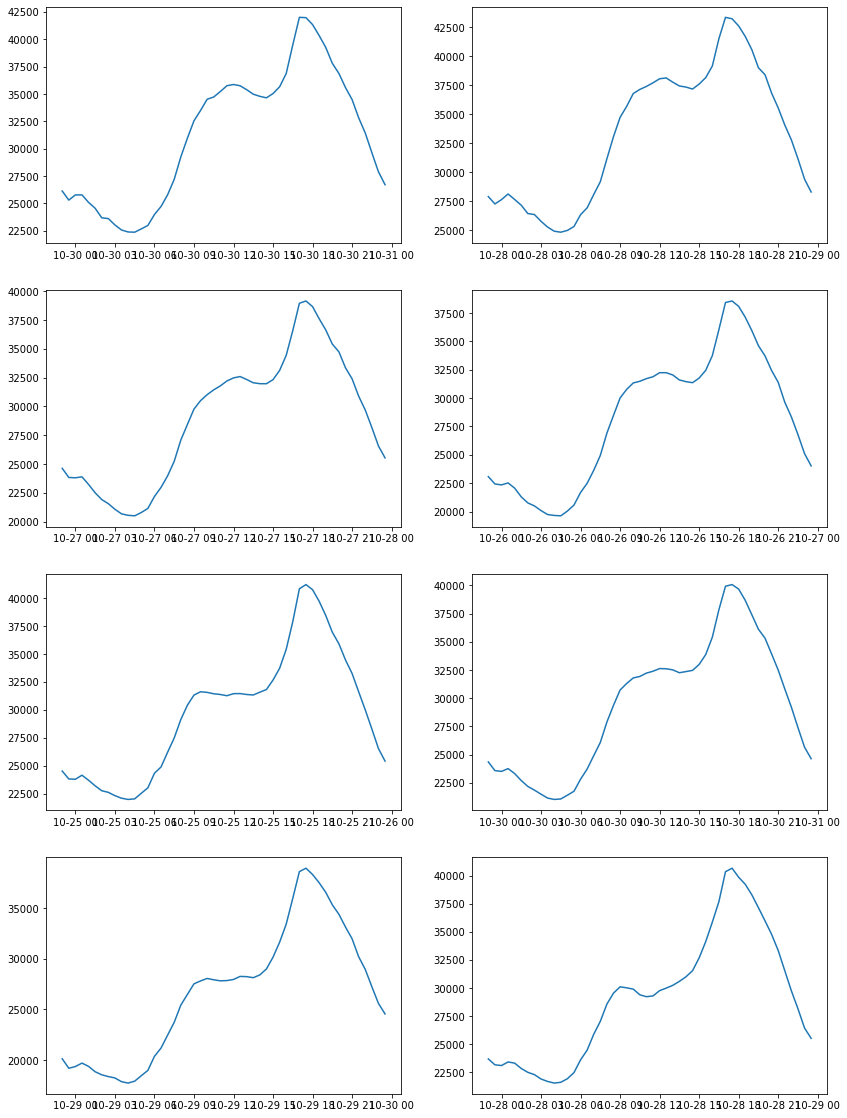

In [202]:
fix, ax = plt.subplots(nrows=4, ncols=2, figsize=(14,20))

ax[0,0].plot(energy[energy.date == '30-Oct-2011'].ND)
ax[0,1].plot(energy[energy.date == '28-Oct-2012'].ND)
ax[1,0].plot(energy[energy.date == '27-Oct-2013'].ND)
ax[1,1].plot(energy[energy.date == '26-Oct-2014'].ND)
ax[2,0].plot(energy[energy.date == '25-Oct-2015'].ND)
ax[2,1].plot(energy[energy.date == '30-Oct-2016'].ND)
ax[3,0].plot(energy[energy.date == '29-OCT-2017'].ND)
ax[3,1].plot(energy[energy.date == '28-OCT-2018'].ND)

plt.show()

# from these october mistake days, we can indeed see something that looks like a different pattern to march ---
# the first few entries, there is a common pattern we don't see in march. Needs further investiation, looking at
# other days to see if this change in pattern is really something that lasts beyond the 'break' days.

The first periods seem maybe a little different for the two months... Slightly different visual features in the graphs. Have to check either side of both of them, see if there's a difference with the normal dates too.

In [206]:
# a function to make easier the comparison of demand graphs for four dates
def compare_graphs(dates):
    
    fix, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

    ax[0,0].plot(energy[energy.date == dates[0]].ND)
    ax[0,1].plot(energy[energy.date == dates[1]].ND)
    ax[1,0].plot(energy[energy.date == dates[2]].ND)
    ax[1,1].plot(energy[energy.date == dates[3]].ND)

    plt.show()

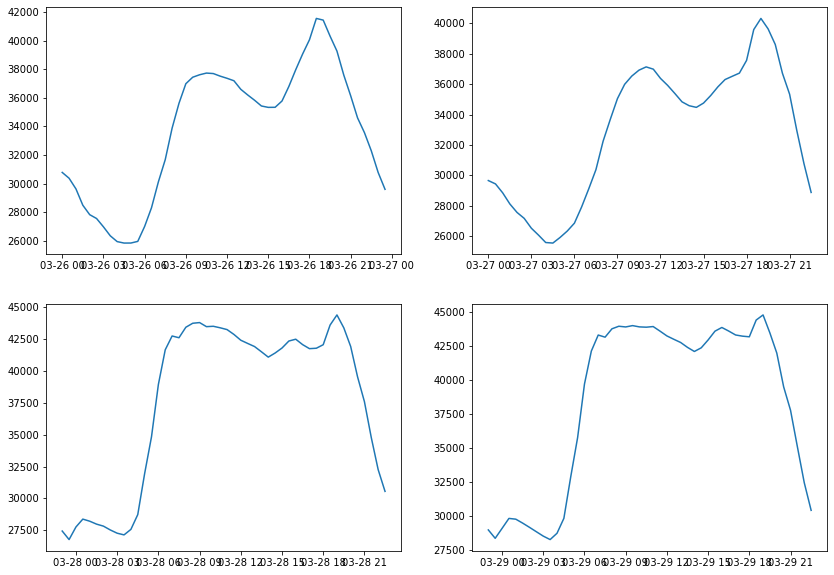

In [207]:
compare_graphs(['26-Mar-2011', '27-Mar-2011', '28-Mar-2011', '29-Mar-2011'])
# here, we can see the same difference pointed out earlier --- the first few periods appear to exhibit different
# characteristics on either side of the breaks

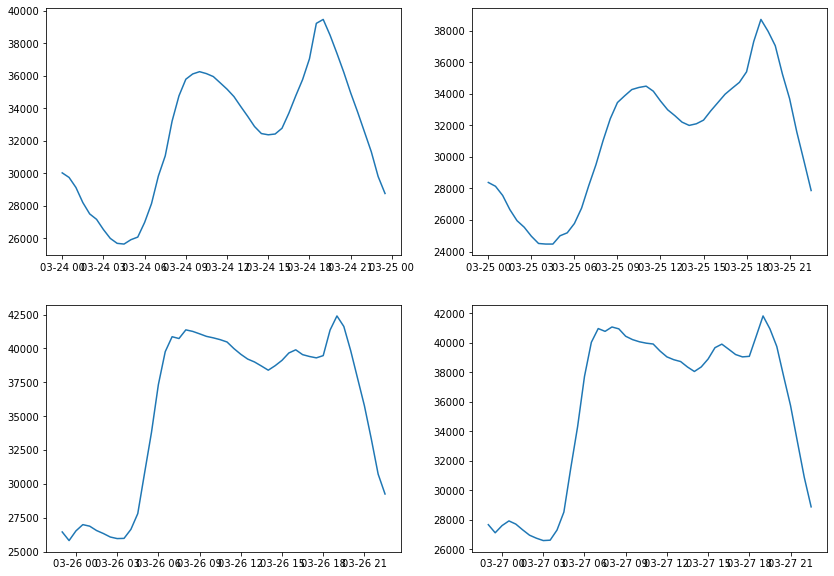

In [209]:
compare_graphs(['24-Mar-2012', '25-Mar-2012', '26-Mar-2012', '27-Mar-2012'])
# yeh they fucked the periods, i'm sure

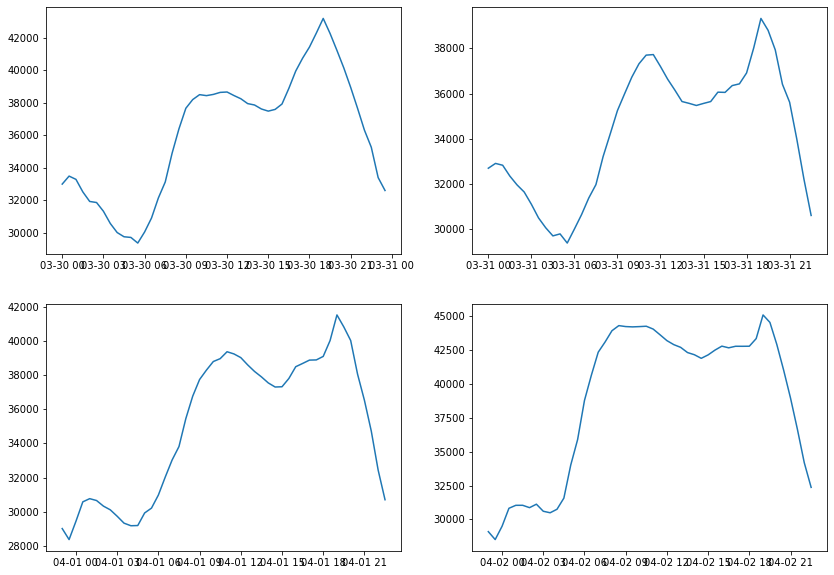

In [210]:
compare_graphs(['30-Mar-2013', '31-Mar-2013', '01-Apr-2013', '02-Apr-2013'])

This is really useful. Can see what's happening. Just gonna check out the same thing for October now.

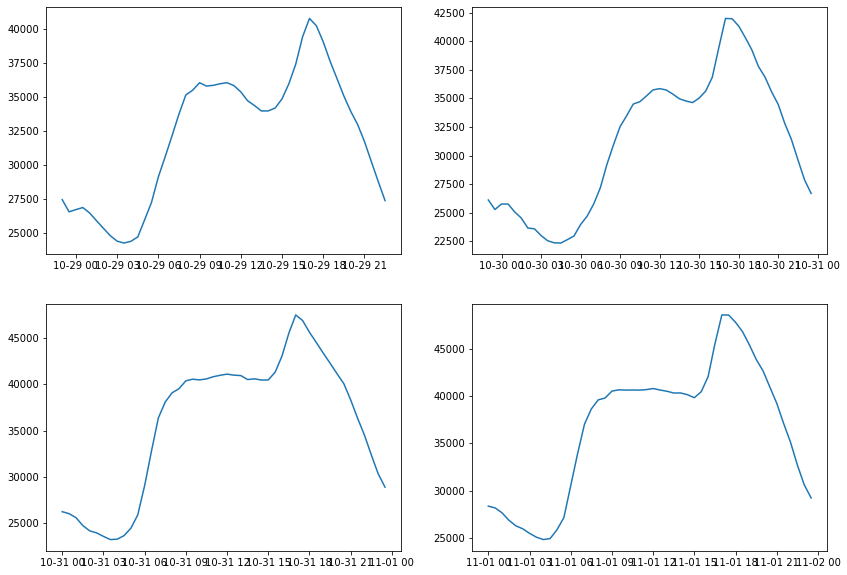

In [211]:
compare_graphs(['29-Oct-2011', '30-Oct-2011', '31-Oct-2011', '01-Nov-2011'])
# yeahhhhh same story

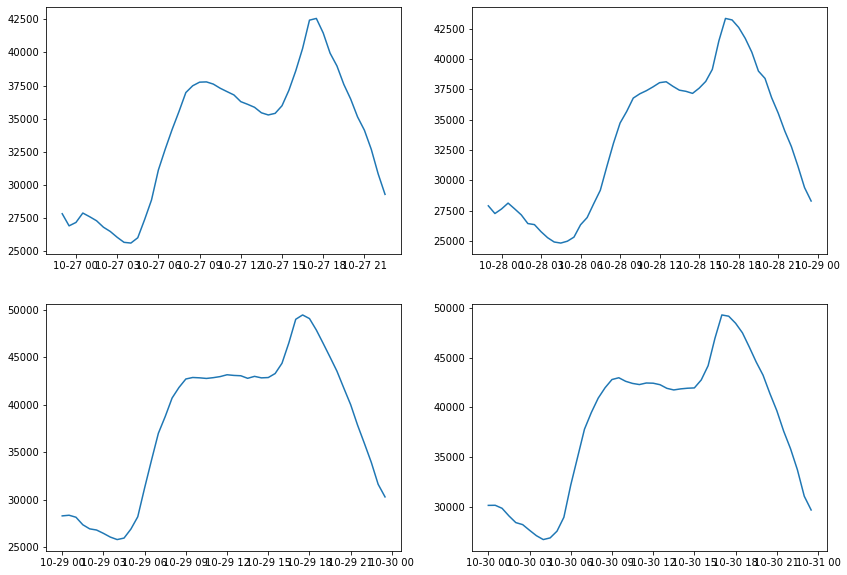

In [212]:
compare_graphs(['27-Oct-2012', '28-Oct-2012', '29-Oct-2012', '30-Oct-2012'])

Now just check that this pattern continues after each break until the break-back, i.e. that this isn't just reflecting a structural thing which is the reason why the segmentation is like this...

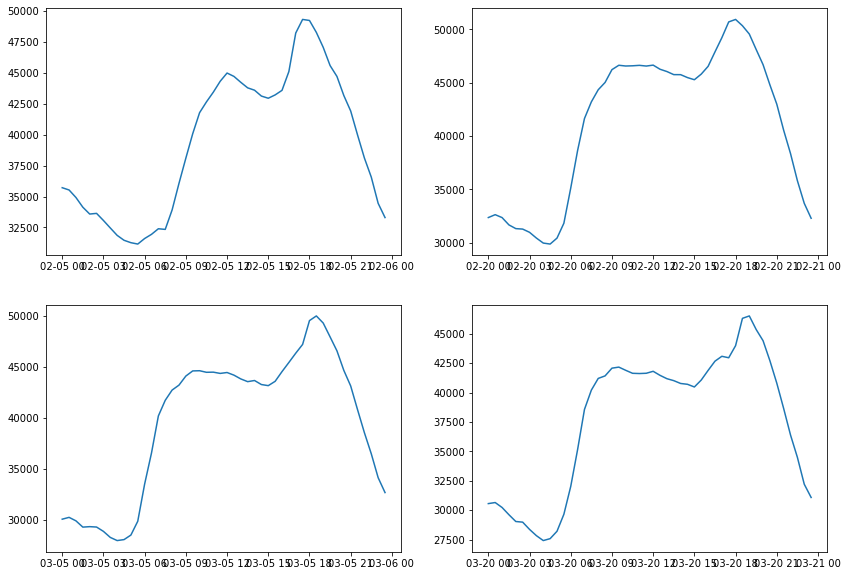

In [213]:
compare_graphs(['05-Feb-2012', '20-Feb-2012', '05-Mar-2012', '20-Mar-2012'])
# we also check if the characteristics are still found at a distance from the break points.
# These dates are all before the March 'break'.

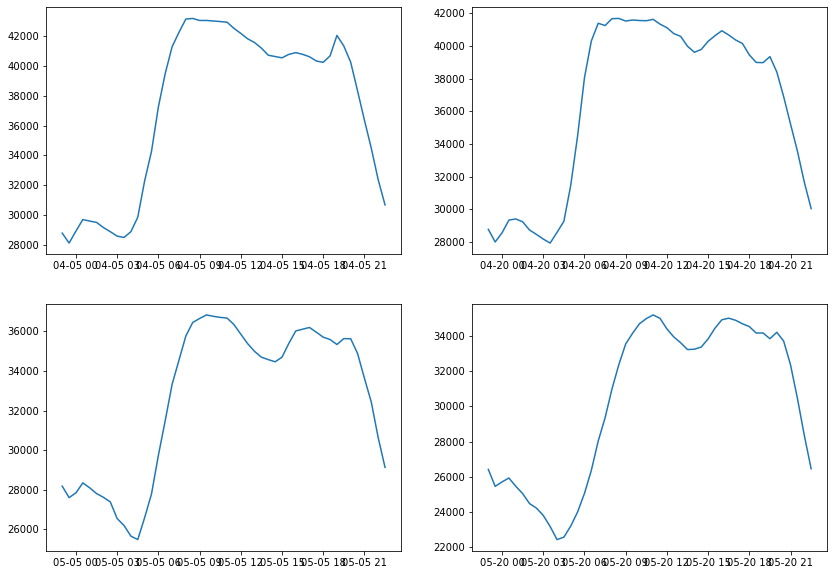

In [214]:
compare_graphs(['05-Apr-2012', '20-Apr-2012', '05-May-2012', '20-May-2012'])
# These dates are all after the March 'break' --- we can see the same characteristic difference in the first 
# periods. These dates are at varying distances from the break.

These findings indicate that the error was simply an omission of the final few periods on the day in March - then, these omitted entries are entered as the first two periods on the next day in March, and that subsequent day then also has its last entry as that from 10.30pm, etc. The shift is corrected when the final two half-hour periods of the day are included as periods 49 & 50 in October. 

SO --- all good before ~28 March. Then, too few entries for one day - it only goes up until (and including) 10.30. Entries for periods 47 & 48 are entered as periods 1 & 2 on the next day, and the shift remains until October, when one day starts at 11.00pm the previous day, and ends at the actual end of its day, correcting the shift. So, all that needs to be done is to re-index using pd.date_range, and we can forget about the provided periods.